In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e7f6953ec46a9e933b98df3ae337e35e


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | burica
City not found. Skipping...
Processing Record 4 of Set 1 | belmonte
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | bocanda
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | eureka
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | satitoa
City not found. Skipping...
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | bend
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | praya
Processing Record 22 of Set 1 | nemuro
Processing Rec

Processing Record 42 of Set 4 | mirzapur
Processing Record 43 of Set 4 | innisfail
Processing Record 44 of Set 4 | tecoanapa
Processing Record 45 of Set 4 | north tonawanda
Processing Record 46 of Set 4 | mulchen
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | tecpan
Processing Record 49 of Set 4 | prado
Processing Record 50 of Set 4 | kununurra
Processing Record 1 of Set 5 | hokitika
Processing Record 2 of Set 5 | letpadan
Processing Record 3 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 5 | lefka
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | dongkan
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | camopi
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | meulaboh
Processing Record 12 of Set 5 | tchibanga
Processing Record 13 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 5 | oliveira dos 

Processing Record 33 of Set 8 | medicine hat
Processing Record 34 of Set 8 | taburi
City not found. Skipping...
Processing Record 35 of Set 8 | tefe
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | azare
Processing Record 39 of Set 8 | chokurdakh
Processing Record 40 of Set 8 | imeni babushkina
Processing Record 41 of Set 8 | tual
Processing Record 42 of Set 8 | zhuanghe
Processing Record 43 of Set 8 | mporokoso
Processing Record 44 of Set 8 | samusu
City not found. Skipping...
Processing Record 45 of Set 8 | baruun-urt
Processing Record 46 of Set 8 | bull savanna
Processing Record 47 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 8 | namtsy
Processing Record 49 of Set 8 | barbastro
Processing Record 50 of Set 8 | itupiranga
Processing Record 1 of Set 9 | umm durman
City not found. Skipping...
Processing Record 2 of Set 9 | kollumerland
City not found. Skipping...
Processing Record 3 

Processing Record 16 of Set 12 | pangnirtung
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | viedma
Processing Record 19 of Set 12 | isla vista
Processing Record 20 of Set 12 | high level
Processing Record 21 of Set 12 | jacksonville beach
Processing Record 22 of Set 12 | ler
Processing Record 23 of Set 12 | debno
Processing Record 24 of Set 12 | khani
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 12 | arman
Processing Record 27 of Set 12 | bahia de caraquez
Processing Record 28 of Set 12 | nelson bay
Processing Record 29 of Set 12 | minas
Processing Record 30 of Set 12 | walvis bay
Processing Record 31 of Set 12 | muros
Processing Record 32 of Set 12 | tateyama
Processing Record 33 of Set 12 | buala
Processing Record 34 of Set 12 | ust-kut
Processing Record 35 of Set 12 | cambrai
Processing Record 36 of Set 12 | san policarpo
Processing Record 37 of Set 12 | lata
Processing Record 38 of Set 12 | safaqis
City no

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,60.80,82,1,8.05,US,2021-02-07 10:05:22
1,Atuona,-9.8000,-139.0333,79.32,76,70,21.85,PF,2021-02-07 10:05:22
2,Belmonte,-15.8631,-38.8828,77.00,88,40,4.61,BR,2021-02-07 10:05:22
3,Fortuna,40.5982,-124.1573,46.99,100,90,4.34,US,2021-02-07 10:05:22
4,Puerto Ayora,-0.7393,-90.3518,75.99,96,43,6.98,EC,2021-02-07 10:05:23
5,Bocanda,7.0626,-4.4995,87.58,56,95,5.73,CI,2021-02-07 10:05:23
6,Albany,42.6001,-73.9662,19.00,60,100,0.87,US,2021-02-07 10:05:23
7,Thompson,55.7435,-97.8558,-34.60,67,20,12.66,CA,2021-02-07 10:04:02
8,Bluff,-46.6000,168.3333,57.06,89,88,6.60,NZ,2021-02-07 10:05:24
9,Busselton,-33.6500,115.3333,62.01,94,100,3.00,AU,2021-02-07 10:05:24


In [13]:
# Create variable for new column order 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Reorder columns in the city data dataframe
city_data_df = city_data_df[new_column_order] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-02-07 10:05:22,22.0752,-159.3190,60.80,82,1,8.05
1,Atuona,PF,2021-02-07 10:05:22,-9.8000,-139.0333,79.32,76,70,21.85
2,Belmonte,BR,2021-02-07 10:05:22,-15.8631,-38.8828,77.00,88,40,4.61
3,Fortuna,US,2021-02-07 10:05:22,40.5982,-124.1573,46.99,100,90,4.34
4,Puerto Ayora,EC,2021-02-07 10:05:23,-0.7393,-90.3518,75.99,96,43,6.98
5,Bocanda,CI,2021-02-07 10:05:23,7.0626,-4.4995,87.58,56,95,5.73
6,Albany,US,2021-02-07 10:05:23,42.6001,-73.9662,19.00,60,100,0.87
7,Thompson,CA,2021-02-07 10:04:02,55.7435,-97.8558,-34.60,67,20,12.66
8,Bluff,NZ,2021-02-07 10:05:24,-46.6000,168.3333,57.06,89,88,6.60
9,Busselton,AU,2021-02-07 10:05:24,-33.6500,115.3333,62.01,94,100,3.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

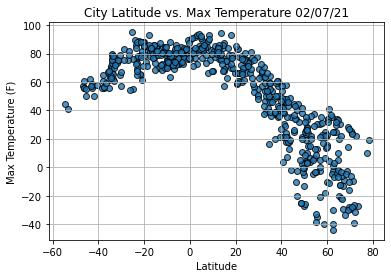

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

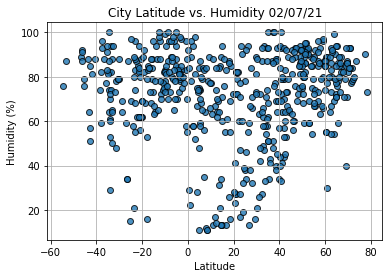

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

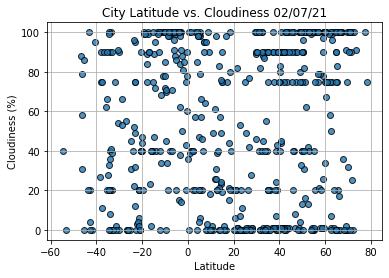

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

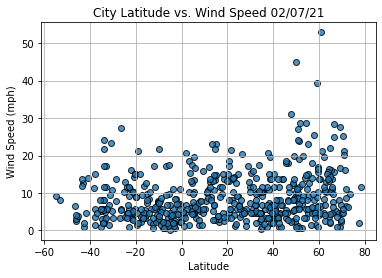

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

In [41]:
# get a specific row from city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2021-02-07 10:02:45
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    64.99
Humidity                       82
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-02-07 10:05:22,22.0752,-159.3190,60.80,82,1,8.05
3,Fortuna,US,2021-02-07 10:05:22,40.5982,-124.1573,46.99,100,90,4.34
5,Bocanda,CI,2021-02-07 10:05:23,7.0626,-4.4995,87.58,56,95,5.73
6,Albany,US,2021-02-07 10:05:23,42.6001,-73.9662,19.00,60,100,0.87
7,Thompson,CA,2021-02-07 10:04:02,55.7435,-97.8558,-34.60,67,20,12.66


In [43]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Atuona,PF,2021-02-07 10:05:22,-9.8000,-139.0333,79.32,76,70,21.85
2,Belmonte,BR,2021-02-07 10:05:22,-15.8631,-38.8828,77.00,88,40,4.61
4,Puerto Ayora,EC,2021-02-07 10:05:23,-0.7393,-90.3518,75.99,96,43,6.98
8,Bluff,NZ,2021-02-07 10:05:24,-46.6000,168.3333,57.06,89,88,6.60
9,Busselton,AU,2021-02-07 10:05:24,-33.6500,115.3333,62.01,94,100,3.00


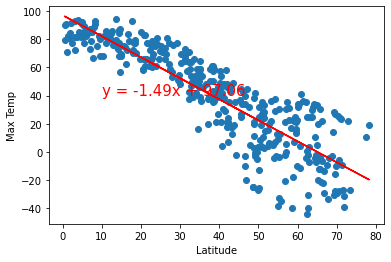

In [66]:
# Plot Linear regression on the Northern Hemisphere for Max Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


In [67]:
# Perform linear regression on Nothern Hemisphere for Max Temp.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get the equation of the line.
northern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq)
print(f"The Northern Hemi Temperature p-value is: {p_value:.3f}")
print(f"The Northern Hemi Temperature r-value is: {r_value:.3f}")

y = -1.49x + 97.06
The Northern Hemi Temperature p-value is: 0.000
The Northern Hemi Temperature r-value is: -0.875


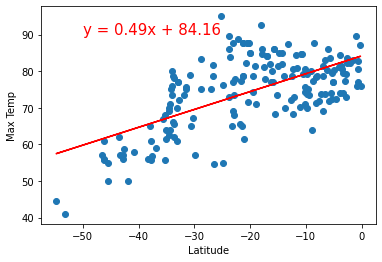

In [68]:
# Plot linear regression on the Southern Hemisphere for Max Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [69]:
# Perform linear regression on Southern Hemisphere for Max Temp.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get the equation of the line.
southern_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq)
print(f"The Southern Hemi Temperature p-value is: {p_value:.3f}")
print(f"The Southern Hemi Temperature r-value is: {r_value:.3f}")

y = 0.49x + 84.16
The Southern Hemi Temperature p-value is: 0.000
The Southern Hemi Temperature r-value is: 0.637


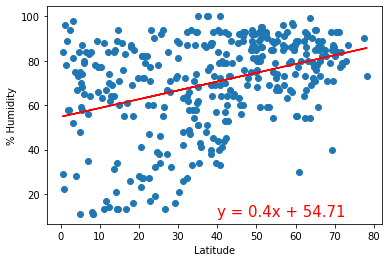

In [70]:
# Plot linear regression on the Northern Hemisphere for Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [71]:
# Perform linear regression on Nothern Hemisphere for Humidity.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get the equation of the line.
northern_line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq1)
print(f"The Northern Hemi Humidity p-value is: {p_value:.3f}")
print(f"The Northern Hemi Humidity r-value is: {r_value:.3f}")

y = 0.4x + 54.71
The Northern Hemi Humidity p-value is: 0.000
The Northern Hemi Humidity r-value is: 0.374


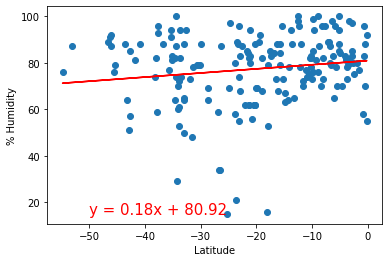

In [79]:
# Plot linear regression on the Southern Hemisphere for Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [73]:
# Perform linear regression on Southern Hemisphere for Humidity.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get the equation of the line.
southern_line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq1)
print(f"The Southern Hemi Humidity p-value is: {p_value:.3f}")
print(f"The Southern Hemi Humidity r-value is: {r_value:.3f}")

y = 0.18x + 80.92
The Southern Hemi Humidity p-value is: 0.040
The Southern Hemi Humidity r-value is: 0.152


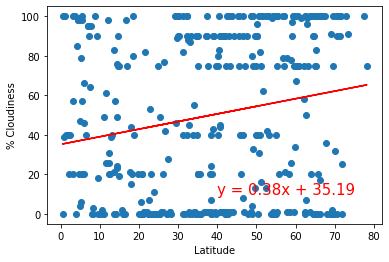

In [80]:
# Plot linear regression on the Northern Hemisphere for Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [74]:
# Perform linear regression on Nothern Hemisphere for Cloudiness.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get the equation of the line.
northern_line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq2)
print(f"The Northern Hemi Cloudiness p-value is: {p_value:.3f}")
print(f"The Northern Hemi Cloudiness r-value is: {r_value:.3f}")

y = 0.38x + 35.19
The Northern Hemi Cloudiness p-value is: 0.000
The Northern Hemi Cloudiness r-value is: 0.194


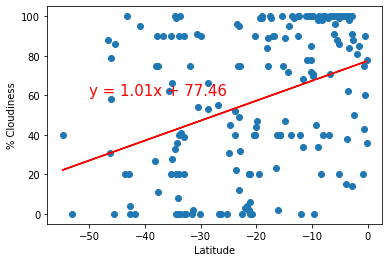

In [81]:
# Plot linear regression on the Southern Hemisphere for Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [75]:
# Perform linear regression on Southern Hemisphere for Cloudiness.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get the equation of the line.
southern_line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq2)
print(f"The Southern Hemi Cloudiness p-value is: {p_value:.3f}")
print(f"The Southern Hemi Cloudiness r-value is: {r_value:.3f}")

y = 1.01x + 77.46
The Southern Hemi Cloudiness p-value is: 0.000
The Southern Hemi Cloudiness r-value is: 0.365


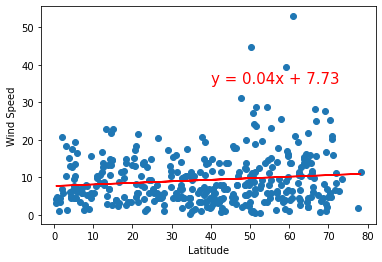

In [82]:
# Plot linear regression on the Northern Hemisphere for Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [76]:
# Perform linear regression on Nothern Hemisphere for Wind Speed.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get the equation of the line.
northern_line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(northern_line_eq3)
print(f"The Northern Hemi Wind Speed p-value is: {p_value:.3f}")
print(f"The Northern Hemi Wind Speed r-value is: {r_value:.3f}")

y = 0.04x + 7.73
The Northern Hemi Wind Speed p-value is: 0.019
The Northern Hemi Wind Speed r-value is: 0.122


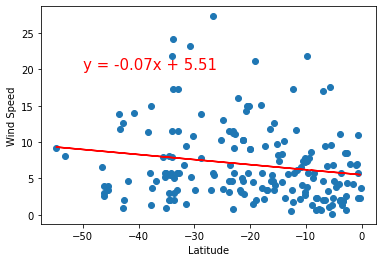

In [94]:
# Plot linear regression on the Southern Hemisphere for Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

In [77]:
# Perform linear regression on Southern Hemisphere for Wind Speed.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get the equation of the line.
southern_line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(southern_line_eq3)
print(f"The Southern Hemi Wind Speed p-value is: {p_value:.3f}")
print(f"The Southern Hemi Wind Speed r-value is: {r_value:.3f}")

y = -0.07x + 5.51
The Southern Hemi Wind Speed p-value is: 0.016
The Southern Hemi Wind Speed r-value is: -0.177
